In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

(1797, 64)


<Figure size 432x288 with 0 Axes>

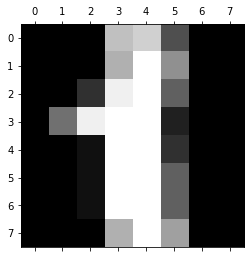

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()
images = digits.images.reshape(digits.images.shape[0], -1)
labels = digits.target


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
train_x, test_x, train_y, test_y = train_test_split(images, labels, random_state=10, test_size=0.20)
log_model = LogisticRegression()
log_model.fit(train_x, train_y)
predicted_values = log_model.predict(test_x)
print("Accuracy Score\n")
print(metrics.accuracy_score(test_y, predicted_values))

Accuracy Score

0.95


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model_pca = PCA(n_components=10)
model_pca.fit(images)
model_pca.fit(train_x, train_y)
train_x = model_pca.transform(train_x)
test_x = model_pca.transform(test_x)
print("Variance Ratio\n")
print(model_pca.explained_variance_ratio_)

Variance Ratio

[0.19832168 0.18348757 0.16100349 0.11609595 0.07960506 0.06613136
 0.05885722 0.04993675 0.04510535 0.04145557]


In [ ]:
log_model_1 = LogisticRegression()
log_model_1.fit(train_x, train_y)
predicted_values_1 = log_model_1.predict(test_x)
print("Variance Ratio\n")
metrics.accuracy_score(predicted_values_1, test_y)

Variance Ratio



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9305555555555556

In [ ]:
conf_metrics = metrics.confusion_matrix(predicted_values_1, test_y)
classification_report = metrics.classification_report(predicted_values_1, test_y)
print("Confusion Metrics\n")
print(conf_metrics)
print("\n\n")
print("Classfication Report\n")
print(classification_report)
print("\n\n")

Confusion Metrics

[[36  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  1  2]
 [ 0  0 34  0  0  0  0  0  2  0]
 [ 0  0  0 38  0  1  0  0  0  0]
 [ 1  1  0  0 31  0  0  1  0  0]
 [ 0  2  0  0  0 29  0  0  0  2]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  1  0  0  0  1 30  2]
 [ 0  0  0  1  2  2  0  1  0 33]]



Classfication Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.91      0.89      0.90        35
           2       1.00      0.94      0.97        36
           3       0.95      0.97      0.96        39
           4       0.91      0.91      0.91        34
           5       0.91      0.88      0.89        33
           6       0.97      1.00      0.99        36
           7       0.93      1.00      0.96        37
           8       0.91      0.88      0.90        34
           9       0.85      0.85      0.85        39

    accuracy                 